In [8]:
jupyter notebook --generate-config

SyntaxError: invalid syntax (<ipython-input-8-ce48075e8c16>, line 1)

In [1]:
from tensorflow.keras.models import load_model

model1 = load_model('MLP_1')

In [2]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=240, max_leaves=15, min_child_weight=0.022794441484877137, learning_rate=0.05392800105066943, subsample=1.0, colsample_bylevel=1.0, colsample_bytree=1.0, reg_alpha=0.0009765625, reg_lambda=0.18227602750012362)

In [3]:
from sklearn.ensemble import HistGradientBoostingRegressor
hist_gbm_model = HistGradientBoostingRegressor(learning_rate=0.1,max_bins=100,max_iter=50,max_leaf_nodes=25,min_samples_leaf=100)

In [4]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor(n_estimators=12, max_features=0.7641570582122252, max_leaf_nodes=880)

In [5]:
from lightgbm import LGBMRegressor
# define model
lgbm_model = LGBMRegressor(n_estimators=2972, num_leaves=12, min_child_samples=54, learning_rate=0.011884037674160988,colsample_bytree=0.887982988974659,reg_alpha=0.24281363297657405, reg_lambda=0.3884086829920825)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=158, max_features=1.0, max_leaf_nodes=1369)

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor(n_estimators=12, max_features=0.7641570582122252, max_leaf_nodes=880)

Sample Dashboard


In [2]:
import pandas  as pd

In [ ]:
df=pd.read_csv('320k.csv')
df.head()

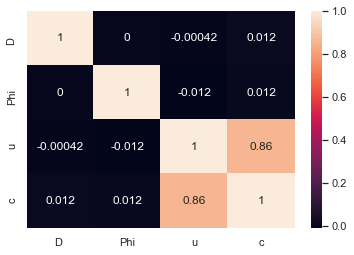

In [9]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(df[['D ', 'Phi','u','c']].corr('spearman'), annot=True)

In [21]:
rf.fit(df[['D ', 'Phi','u']],df['c'])

RandomForestRegressor(max_features=1.0, max_leaf_nodes=1369, n_estimators=158)

In [22]:
import matplotlib.pyplot as plt

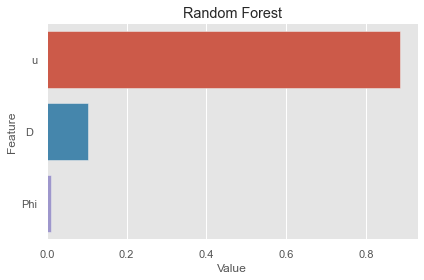

array([0.10464482, 0.01005825, 0.88529693])

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_,df[['D ', 'Phi','u']].columns)), columns=['Value','Feature'])
plt.style.use('ggplot')
#plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random Forest')
plt.tight_layout()
plt.show()
rf.feature_importances_

In [30]:
X=df[['D ', 'Phi','x ','t','u']]
y=df['c']

In [31]:
from sklearn.utils import shuffle
X,y = shuffle(X,y, random_state=0)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
train=pd.DataFrame(X_train,columns=['D ','Phi','x ','t','u'])
train.head()

In [ ]:
test=pd.DataFrame(X_test,columns=['D ','Phi','x ','t','u'])
test.head()

In [35]:
test=test.join(y_test)

In [ ]:
test_10000=test[(test.t == 10000) & (test['D '] == 0.05) & (test['Phi'] == 0.25)]
test_10000

In [39]:
test_17500=test[(test['t'] == 17500) & (test['D '] == 0.05) & (test['Phi'] == 0.25)]
test_17500.shape

(304, 6)

In [40]:
test_43750=test[(test.t == 43750) & (test['D '] == 0.05) & (test['Phi'] == 0.25)]

In [41]:
test_62500=test[(test.t == 62500) & (test['D '] == 0.05) & (test['Phi'] == 0.25)]
test_62500.shape

(306, 6)

In [42]:
test_87500=test[(test.t == 87500) & (test['D '] == 0.05) & (test['Phi'] == 0.25)]
test_87500.shape

(320, 6)

In [43]:
test_90000=test[(test.t == 90000) & (test['D '] == 0.05) & (test['Phi'] == 0.25)]
test_90000.shape

(304, 6)

In [ ]:
stack_test_10000=pd.DataFrame(stack_test,columns=['LGBM','hist','et','rf','xgb','boost','bag'])
stack_test_10000

In [32]:
pred_10000=model1.predict(stack_test_10000)

In [35]:
from sklearn.metrics import r2_score
r2_score(test_10000['c'], pred_10000)

0.9254270883303647

In [36]:
import numpy as np
mlp_scaled=np.array(pred_10000).ravel()

In [37]:
a=abs((mlp_scaled-test_10000['c'])/test_10000['c'])
#b=a/(40)
c=sum(a)
(c*100)/len(test_10000['c'])

11.101264748950701

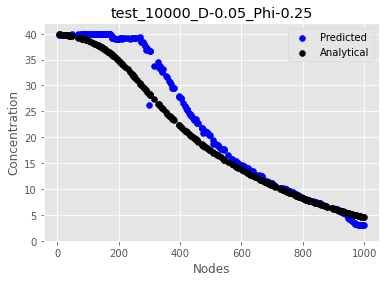

In [91]:
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import ylim
plot.ylim(0, 42)
#figure(figsize=(100,100), dpi=80) 
plot.style.use('ggplot')
plot.scatter(test_10000['x '], pred_10000, color = 'blue',label='Predicted')
plot.scatter(test_10000['x '], test_10000['c'], color = 'black',label='Analytical')
plot.legend(loc='best')
plot.title('test_10000_D-0.05_Phi-0.25')
plot.xlabel('Nodes')
plot.ylabel('Concentration')
plot.show()

In [ ]:
stack_test_17500=pd.DataFrame(stack_test_17500,columns=['LGBM','hist','et','rf','xgb','boost','bag'])
stack_test_17500

In [41]:
pred_17500=model1.predict(stack_test_17500)

In [42]:
from sklearn.metrics import r2_score
r2_score(test_17500['c'], pred_17500)

0.9229606053275549

In [43]:
import numpy as np
mlp_17500=np.array(pred_17500).ravel()

In [44]:
a=abs((mlp_17500-test_17500['c'])/test_17500['c'])
#b=a/(40)
c=sum(a)
(c*100)/len(test_17500['c'])

8.034336079019154

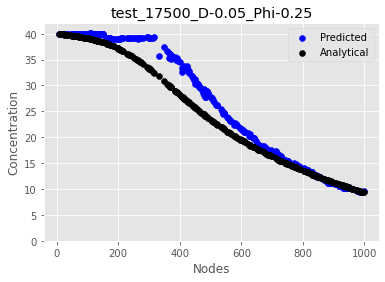

In [92]:
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import ylim
plot.ylim(0, 42)
#figure(figsize=(100,100), dpi=80) 
plot.style.use('ggplot')
plot.scatter(test_17500['x '], pred_17500, color = 'blue',label='Predicted')
plot.scatter(test_17500['x '], test_17500['c'], color = 'black',label='Analytical')
plot.legend(loc='best')
plot.title('test_17500_D-0.05_Phi-0.25')
plot.xlabel('Nodes')
plot.ylabel('Concentration')
plot.show()

In [ ]:
stack_test_43750=pd.DataFrame(stack_test,columns=['LGBM','hist','et','rf','xgb','boost','bag'])
stack_test_43750

In [49]:
pred_43750=model1.predict(stack_test_43750)

In [50]:
from sklearn.metrics import r2_score
r2_score(test_43750['c'], pred_43750)

0.9340523392382194

In [51]:
import numpy as np
mlp_43750=np.array(pred_43750).ravel()

In [52]:
a=abs((mlp_43750-test_43750['c'])/test_43750['c'])
#b=a/(40)
c=sum(a)
(c*100)/len(test_43750['c'])

4.8601071352799465

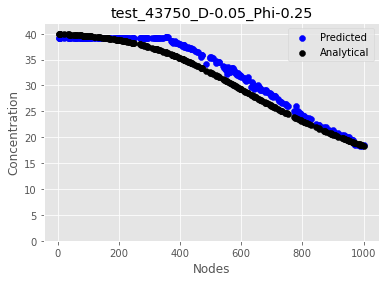

In [93]:
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import ylim
plot.ylim(0, 42)
#figure(figsize=(100,100), dpi=80) 
plot.style.use('ggplot')
plot.scatter(test_43750['x '], pred_43750, color = 'blue',label='Predicted')
plot.scatter(test_43750['x '], test_43750['c'], color = 'black',label='Analytical')
plot.legend(loc='best')
plot.title('test_43750_D-0.05_Phi-0.25')
plot.xlabel('Nodes')
plot.ylabel('Concentration')
plot.show()

In [ ]:
stack_test_62500=pd.DataFrame(stack_test,columns=['LGBM','hist','et','rf','xgb','boost','bag'])
stack_test_62500

In [58]:
pred_62500=model1.predict(stack_test_62500)

In [61]:
from sklearn.metrics import r2_score
r2_score(test_62500['c'], pred_62500)

0.9688367015098176

In [62]:
import numpy as np
mlp_62500=np.array(pred_62500).ravel()

In [63]:
a=abs((mlp_62500-test_62500['c'])/test_62500['c'])
#b=a/(40)
c=sum(a)
(c*100)/len(test_62500['c'])

2.577661613021086

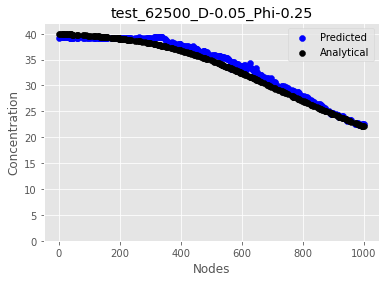

In [94]:
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import ylim
plot.ylim(0, 42)
#figure(figsize=(100,100), dpi=80) 
plot.style.use('ggplot')
plot.scatter(test_62500['x '], pred_62500, color = 'blue',label='Predicted')
plot.scatter(test_62500['x '], test_62500['c'], color = 'black',label='Analytical')
plot.legend(loc='best')
plot.title('test_62500_D-0.05_Phi-0.25')
plot.xlabel('Nodes')
plot.ylabel('Concentration')
plot.show()

In [ ]:
stack_test_87500=pd.DataFrame(stack_test,columns=['LGBM','hist','et','rf','xgb','boost','bag'])
stack_test_87500

In [67]:
pred_87500=model1.predict(stack_test_87500)

In [68]:
from sklearn.metrics import r2_score
r2_score(test_87500['c'], pred_87500)

0.9929379295909223

In [69]:
import numpy as np
mlp_87500=np.array(pred_87500).ravel()

In [70]:
a=abs((mlp_87500-test_87500['c'])/test_87500['c'])
#b=a/(40)
c=sum(a)
(c*100)/len(test_87500['c'])

0.789840439932814

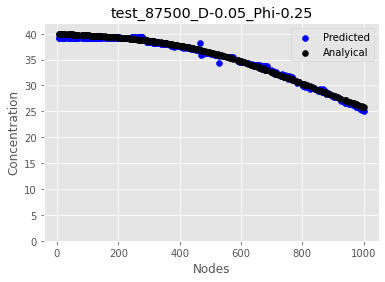

In [95]:
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import ylim
plot.ylim(0, 42)
#figure(figsize=(100,100), dpi=80) 
plot.style.use('ggplot')
plot.scatter(test_87500['x '], pred_87500, color = 'blue',label='Predicted')
plot.scatter(test_87500['x '], test_87500['c'], color = 'black',label='Analyical')
plot.legend(loc='best')
plot.title('test_87500_D-0.05_Phi-0.25')
plot.xlabel('Nodes')
plot.ylabel('Concentration')
plot.show()

In [ ]:
stack_test_90000=pd.DataFrame(stack_test,columns=['LGBM','hist','et','rf','xgb','boost','bag'])
stack_test_90000

In [81]:
pred_90000=model1.predict(stack_test_90000)

In [82]:
from sklearn.metrics import r2_score
r2_score(test_90000['c'], pred_90000)

0.994077084748552

In [83]:
import numpy as np
mlp_90000=np.array(pred_90000).ravel()

In [84]:
a=abs((mlp_90000-test_90000['c'])/test_90000['c'])
#b=a/(40)
c=sum(a)
(c*100)/len(test_90000['c'])

0.7577968194361805

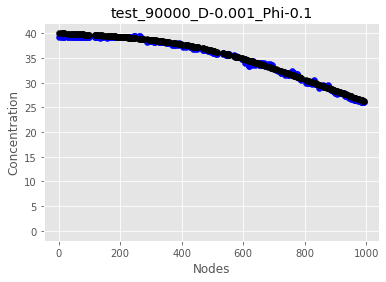

In [85]:
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import ylim
plot.ylim(-2, 42)
#figure(figsize=(100,100), dpi=80) 
plot.style.use('ggplot')
plot.scatter(test_90000['x '], pred_90000, color = 'blue')
plot.scatter(test_90000['x '], test_90000['c'], color = 'black')
plot.title('test_90000_D-0.001_Phi-0.1')
plot.xlabel('Nodes')
plot.ylabel('Concentration')
plot.show()